In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox


In [5]:
data=np.random.exponential(scale=2,size=1000)
df=pd.DataFrame({"Salary":data})

In [6]:
df.head()

,Salary
0,0.345202
1,0.258899
2,1.404732
3,0.861956
4,6.080879


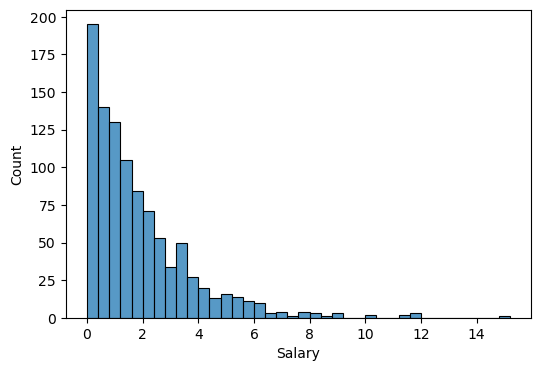

In [10]:
plt.figure(figsize=(6,4))
sns.histplot(df.Salary)
plt.show()

In [11]:
df.Salary.skew()

np.float64(2.1305650048208546)

In [13]:
df["updated_Salary"],lambda_val = boxcox(df.Salary)

In [14]:
df.head()

,Salary,updated_Salary
0,0.345202,-0.927825
1,0.258899,-1.137297
2,1.404732,0.355496
3,0.861956,-0.145687
4,6.080879,2.310283


In [18]:
lambda_val

np.float64(0.26297539136722436)

In [16]:
df.updated_Salary.skew()

np.float64(-0.035578592740371257)

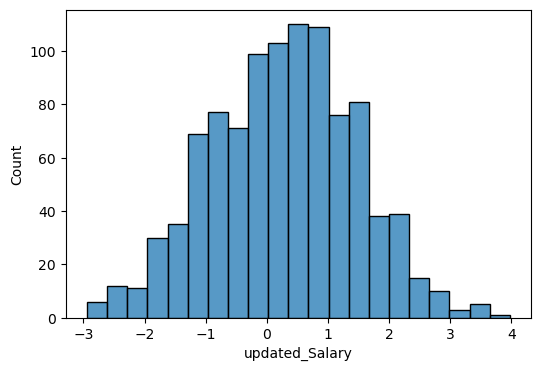

In [17]:
plt.figure(figsize=(6,4))
sns.histplot(df.updated_Salary)
plt.show()

In [19]:
##left skew distribution

In [20]:
data=np.random.exponential(scale=2,size=1000)
data=10-data
df=pd.DataFrame({"Salary2":data})

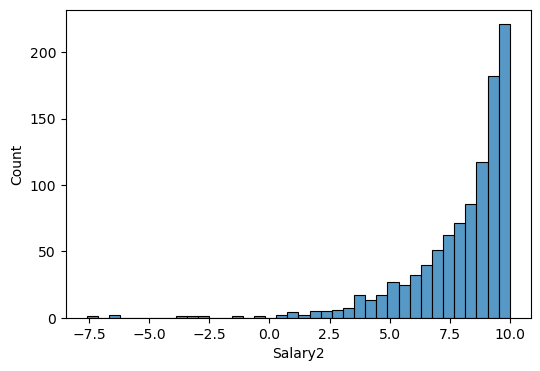

In [21]:
plt.figure(figsize=(6,4))
sns.histplot(df.Salary2)
plt.show()

In [22]:
df.Salary2.skew()

np.float64(-2.3284046963505665)

In [33]:
df["reflex_salary"] = (df.Salary2.max()-df.Salary2)+1

In [34]:
df.head()

,Salary2,reflex_salary
0,8.915331,2.083143
1,9.856193,1.142281
2,8.884667,2.113807
3,8.657984,2.340490
4,9.529200,1.469274


In [35]:
max(df.reflex_salary),  min(df.reflex_salary)

(18.584765102935762, 1.0)

In [36]:
df["transformed_salary"]=np.log(df.reflex_salary)+1

In [37]:
df.transformed_salary.skew()

np.float64(0.5000148057683943)

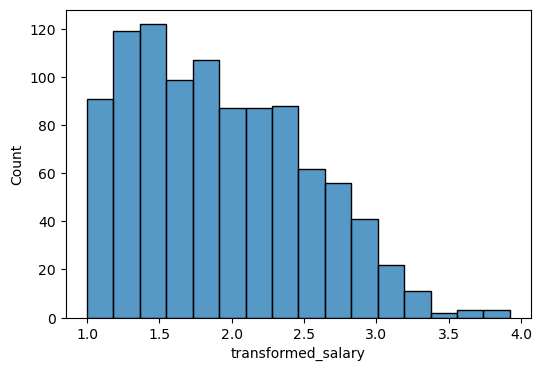

In [39]:
plt.figure(figsize=(6,4))
sns.histplot(df.transformed_salary)
plt.show()

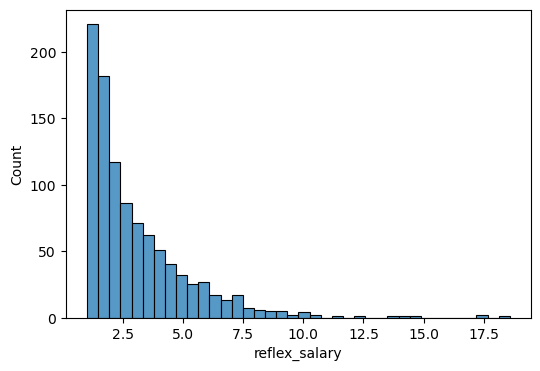

In [40]:
plt.figure(figsize=(6,4))
sns.histplot(df.reflex_salary)
plt.show()

In [49]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder , OneHotEncoder


In [50]:
df=pd.read_csv(r"C:\Users\preet\Desktop\test2.csv")
df

,Unnamed: 0,Name,Age,Department,Salary
0,0,Alice,25.0,HR,50000.0
1,1,Bob,30.0,IT,60000.0
2,2,Charlie,35.0,Finance,70000.0
3,3,David,NaN,IT,62000.0
4,4,Eve,29.0,HR,NaN
5,5,Alice,25.0,HR,50000.0


In [51]:
df.shape

(6, 5)

In [52]:
df["Age"]=df["Age"].fillna(value=df["Age"].mean())
df["Salary"]=df["Salary"].fillna(value=df["Salary"].mean())
df

,Unnamed: 0,Name,Age,Department,Salary
0,0,Alice,25.0,HR,50000.0
1,1,Bob,30.0,IT,60000.0
2,2,Charlie,35.0,Finance,70000.0
3,3,David,28.8,IT,62000.0
4,4,Eve,29.0,HR,58400.0
5,5,Alice,25.0,HR,50000.0


In [53]:
encoder = LabelEncoder()

In [54]:
df["transformed_name"] = encoder.fit_transform(df.Name)

In [55]:
df.head()

,Unnamed: 0,Name,Age,Department,Salary,transformed_name
0,0,Alice,25.0,HR,50000.0,0
1,1,Bob,30.0,IT,60000.0,1
2,2,Charlie,35.0,Finance,70000.0,2
3,3,David,28.8,IT,62000.0,3
4,4,Eve,29.0,HR,58400.0,4


In [58]:
df[["Department"]].shape

(6, 1)

In [57]:
encoder2 = OneHotEncoder(sparse_output=False)

In [59]:
encoded = encoder2.fit_transform(df[["Department"]])

In [60]:
encoder2.get_feature_names_out()

array(['Department_Finance', 'Department_HR', 'Department_IT'],
      dtype=object)

In [61]:
encoded

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [63]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler

In [64]:
scaler = StandardScaler()

In [65]:
df["scaled_salary"] = scaler.fit_transform(df[["Salary"]])

In [66]:
df.head()

,Unnamed: 0,Name,Age,Department,Salary,transformed_name,scaled_salary
0,0,Alice,25.0,HR,50000.0,0,-1.205755
1,1,Bob,30.0,IT,60000.0,1,0.229668
2,2,Charlie,35.0,Finance,70000.0,2,1.665091
3,3,David,28.8,IT,62000.0,3,0.516752
4,4,Eve,29.0,HR,58400.0,4,0.000000


In [67]:
scaler=MinMaxScaler()
df["scaled_salary"] = scaler.fit_transform(df[["Salary"]])

In [68]:
df.head()

,Unnamed: 0,Name,Age,Department,Salary,transformed_name,scaled_salary
0,0,Alice,25.0,HR,50000.0,0,0.00
1,1,Bob,30.0,IT,60000.0,1,0.50
2,2,Charlie,35.0,Finance,70000.0,2,1.00
3,3,David,28.8,IT,62000.0,3,0.60
4,4,Eve,29.0,HR,58400.0,4,0.42


In [70]:
##data vistualization

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns


In [73]:
df=pd.read_csv(r"C:\Users\preet\Downloads\data_visualization.csv")

In [74]:
df

,Unnamed: 0,Student_ID,Name,Gender,Department,Age,Math_Score,Science_Score,Attendance_Percentage,Study_Hours_per_Week
0,0,1,Aarav,Male,CS,21,78,75,85,10
1,1,2,Diya,Female,IT,22,85,88,90,12
2,2,3,Rohan,Male,CS,20,90,85,95,15
3,3,4,Sneha,Female,ECE,21,67,70,80,8
4,4,5,Arjun,Male,IT,23,88,90,92,14
5,5,6,Meera,Female,ECE,22,76,79,88,9
6,6,7,Kiran,Male,CS,21,92,94,96,16
7,7,8,Ananya,Female,IT,20,81,83,89,11
8,8,9,Rahul,Male,ECE,22,74,72,75,7
9,9,10,Isha,Female,CS,23,89,91,93,15


In [75]:
df.head()

,Unnamed: 0,Student_ID,Name,Gender,Department,Age,Math_Score,Science_Score,Attendance_Percentage,Study_Hours_per_Week
0,0,1,Aarav,Male,CS,21,78,75,85,10
1,1,2,Diya,Female,IT,22,85,88,90,12
2,2,3,Rohan,Male,CS,20,90,85,95,15
3,3,4,Sneha,Female,ECE,21,67,70,80,8
4,4,5,Arjun,Male,IT,23,88,90,92,14


<Figure size 640x480 with 0 Axes>

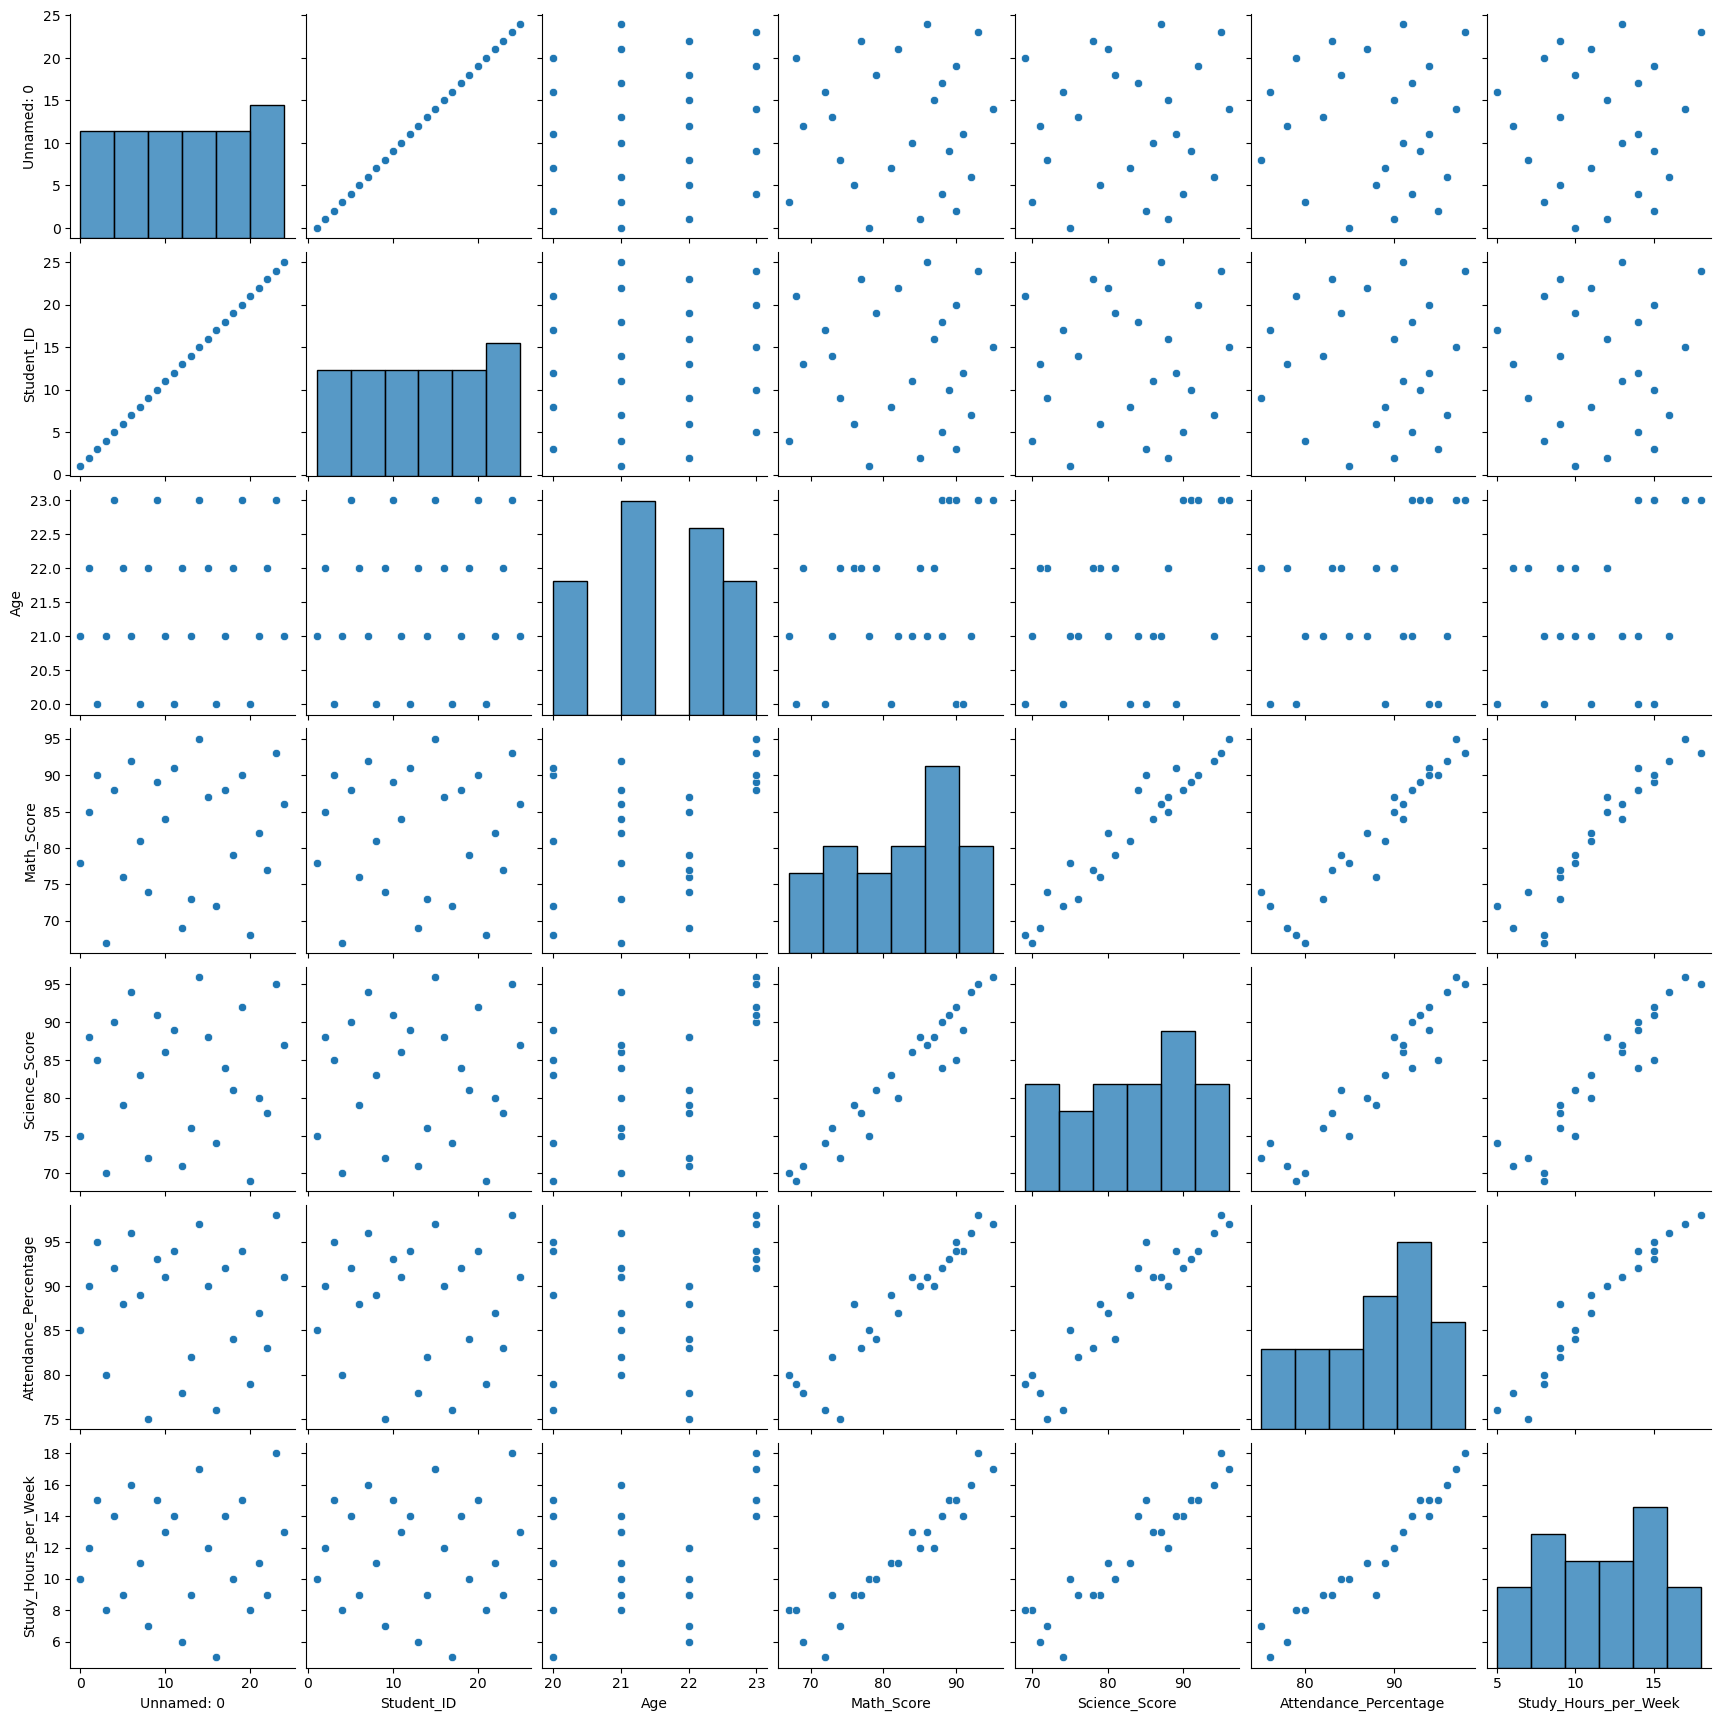

In [76]:
plt.figure()
sns.pairplot(df)

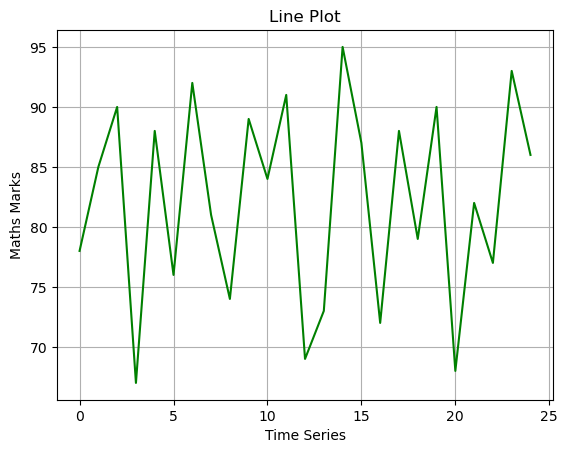

In [84]:
plt.plot(df.Math_Score, color="green")
plt.grid()
plt.title("Line Plot")
plt.xlabel("Time Series")
plt.ylabel("Maths Marks")
plt.show()

In [2]:
##Sample

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox


In [7]:
df=pd.read_csv(r"C:\Users\preet\Downloads\data_visualization.csv")


In [8]:
df

,Unnamed: 0,Student_ID,Name,Gender,Department,Age,Math_Score,Science_Score,Attendance_Percentage,Study_Hours_per_Week
0,0,1,Aarav,Male,CS,21,78,75,85,10
1,1,2,Diya,Female,IT,22,85,88,90,12
2,2,3,Rohan,Male,CS,20,90,85,95,15
3,3,4,Sneha,Female,ECE,21,67,70,80,8
4,4,5,Arjun,Male,IT,23,88,90,92,14
5,5,6,Meera,Female,ECE,22,76,79,88,9
6,6,7,Kiran,Male,CS,21,92,94,96,16
7,7,8,Ananya,Female,IT,20,81,83,89,11
8,8,9,Rahul,Male,ECE,22,74,72,75,7
9,9,10,Isha,Female,CS,23,89,91,93,15


In [9]:
df.head()

,Unnamed: 0,Student_ID,Name,Gender,Department,Age,Math_Score,Science_Score,Attendance_Percentage,Study_Hours_per_Week
0,0,1,Aarav,Male,CS,21,78,75,85,10
1,1,2,Diya,Female,IT,22,85,88,90,12
2,2,3,Rohan,Male,CS,20,90,85,95,15
3,3,4,Sneha,Female,ECE,21,67,70,80,8
4,4,5,Arjun,Male,IT,23,88,90,92,14


<Axes: >

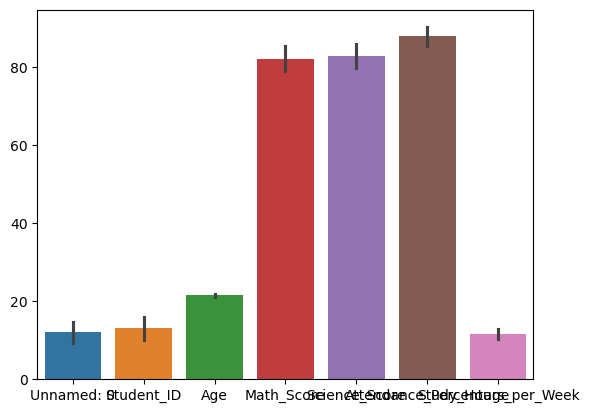

In [10]:
plt.figure()
sns.barplot(df)

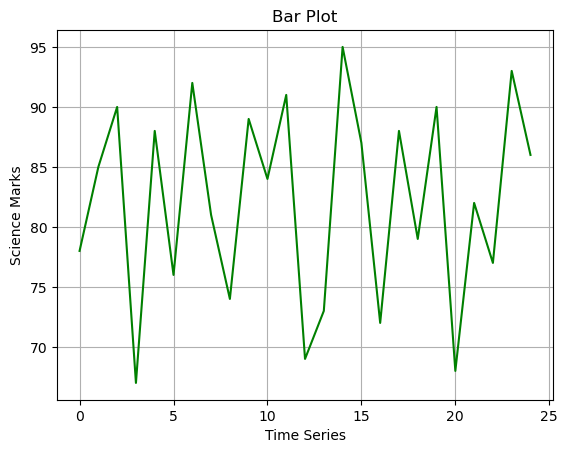

In [11]:
plt.plot(df.Math_Score, color="green")
plt.grid()
plt.title("Bar Plot")
plt.xlabel("Time Series")
plt.ylabel("Science Marks")
plt.show()

<Axes: ylabel='Count'>

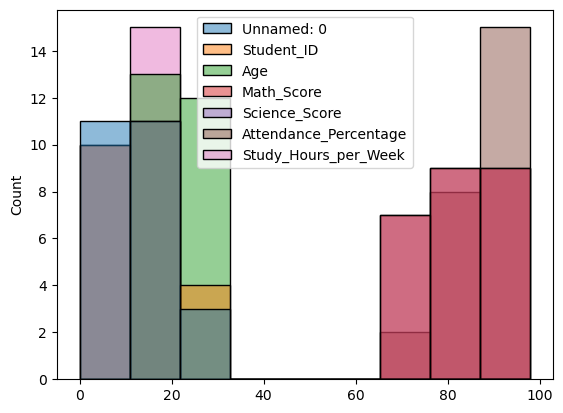

In [14]:
plt.figure()
sns.histplot(df)

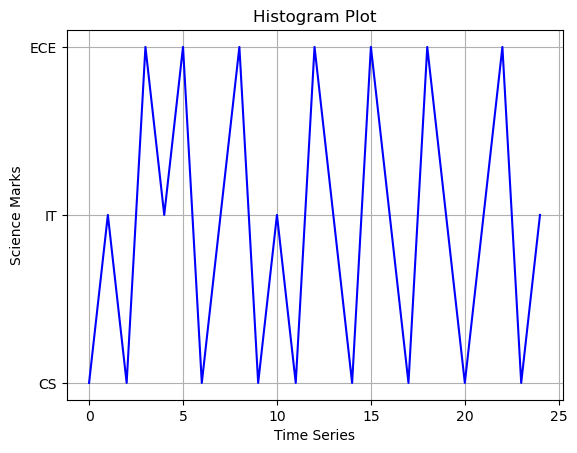

In [26]:
plt.plot(df.Department, color="Blue")
plt.grid()
plt.title("Histogram Plot")
plt.xlabel("Time Series")
plt.ylabel("Science Marks")
plt.show()

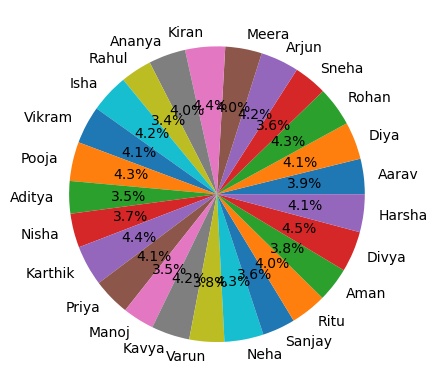

In [28]:
plt.figure()
plt.pie(df['Attendance_Percentage'], labels=df['Name'], autopct='%1.1f%%')
plt.show()


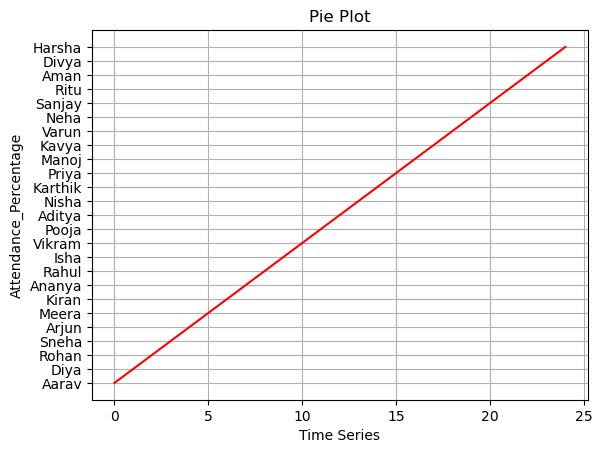

In [29]:
plt.plot(df.Name, color="Red")
plt.grid()
plt.title("Pie Plot")
plt.xlabel("Time Series")
plt.ylabel("Attendance_Percentage")
plt.show()

<Axes: >

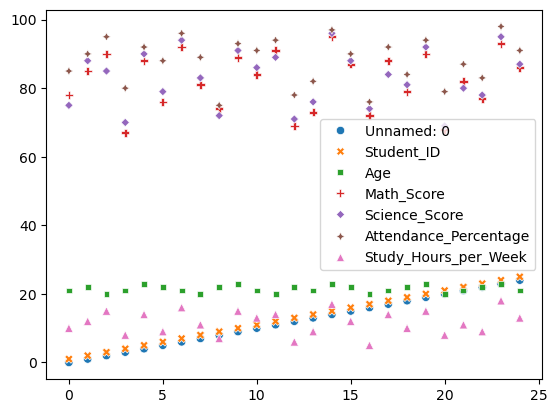

In [30]:
plt.figure()
sns.scatterplot(df)

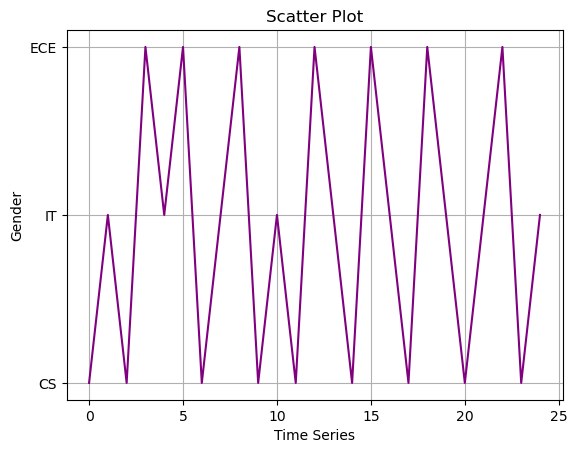

In [31]:
plt.plot(df.Department, color="Purple")
plt.grid()
plt.title("Scatter Plot")
plt.xlabel("Time Series")
plt.ylabel("Gender")
plt.show()

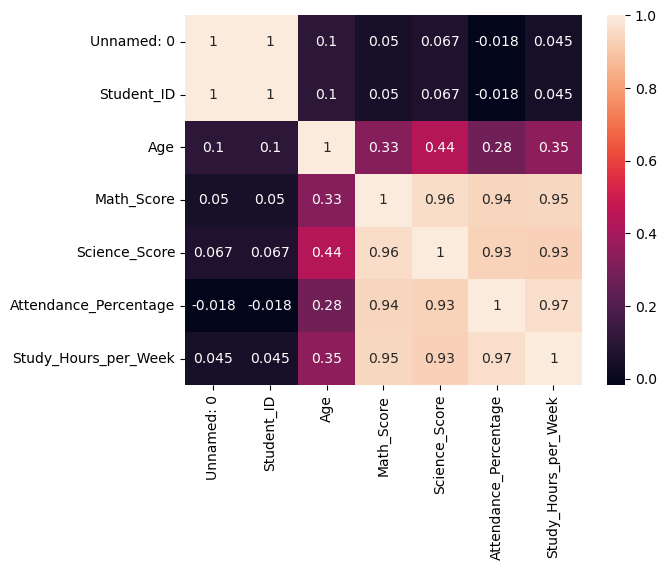

In [34]:
plt.figure()
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)
plt.show()


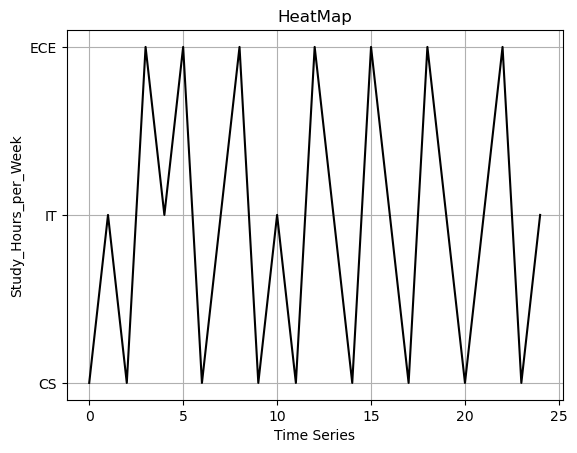

In [35]:
plt.plot(df.Department, color="Black")
plt.grid()
plt.title("HeatMap")
plt.xlabel("Time Series")
plt.ylabel("Study_Hours_per_Week")
plt.show()

<Axes: >

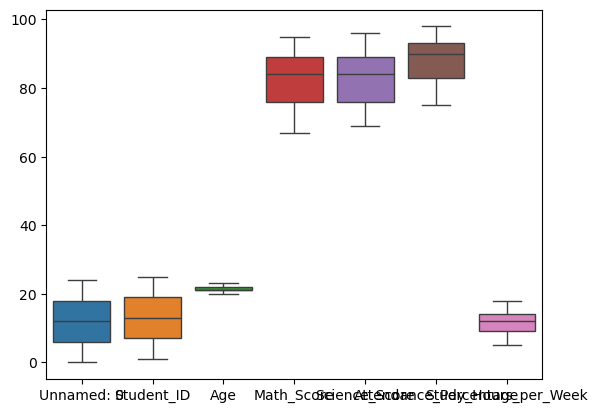

In [36]:
plt.figure()
sns.boxplot(df)

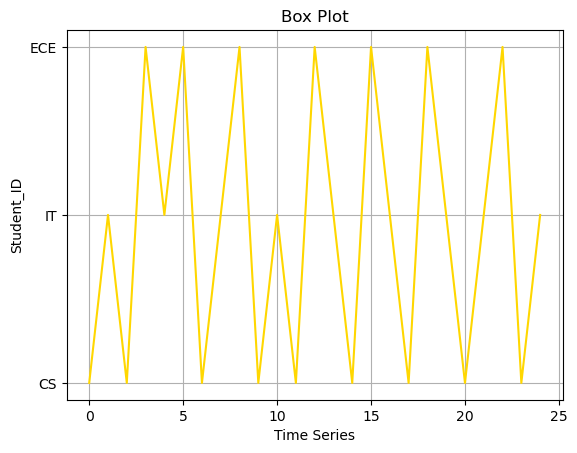

In [41]:
plt.plot(df.Department, color="GOld")
plt.grid()
plt.title("Box Plot")
plt.xlabel("Time Series")
plt.ylabel("Student_ID")
plt.show()

In [44]:
##Task1

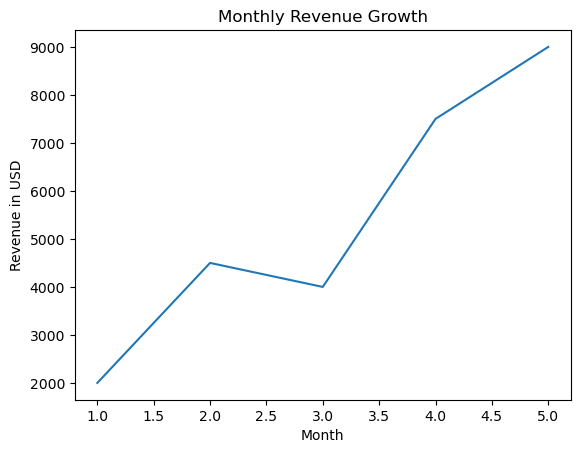

In [45]:
import matplotlib.pyplot as plt
months = [1, 2, 3, 4, 5]
revenue = [2000, 4500, 4000, 7500, 9000]
plt.plot(months, revenue)
plt.title("Monthly Revenue Growth")
plt.xlabel("Month")
plt.ylabel("Revenue in USD")

plt.show()